#  What will affect taxi drivers’ profit
## Aspect 2: What will bring taxi drivers more tips in New York?

In [56]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import seaborn as sns

In [57]:
# we selected special peroid of time to observe
# Sports time
# Rain
# Workdays
# Weekends

In [58]:
# As we mentioned before the sports did not bring much demand for taxi, there fore we treat events as normal bussiness day and weekends.

In [118]:
full_month = pd.read_feather('18_cleaned_yellow_09.feather').drop('index', axis=1)

In [60]:
#Rain = full_month[full_month["date"] == "09-10"]

In [81]:
tips_count = full_month.groupby("date")["tip_amount"].sum()
date_count = full_month['date'].value_counts().sort_index()
avg_tip = tips_count/date_count

In [82]:
weekend_bar_count = avg_tip.copy()
weekday_bar_count = avg_tip.copy()
rain_bar_count = avg_tip.copy()

In [83]:
for i in range(len(weekend_bar_count)):
    if weekend_bar_count.index[i] not in ['09-05','09-06', '09-12', '09-13','09-19', '09-20','09-26', '09-27']:
        weekend_bar_count[weekend_bar_count.index[i]] = 0

In [84]:
for i in range(len(rain_bar_count)):
    if rain_bar_count.index[i] not in ['09-09','09-10', '09-25']:
        rain_bar_count[rain_bar_count.index[i]] = 0

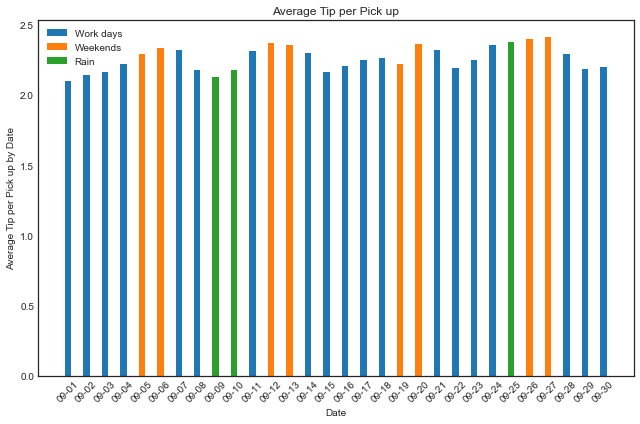

In [85]:
labels = avg_tip.index

x = np.arange(len(labels))  # the label locations

width = 0.35

fig, ax = plt.subplots(figsize=(9,6))

work_bar = ax.bar(x, weekday_bar_count, width, label='Work days')
weekend_bar = ax.bar(x, weekend_bar_count, width, label='Weekends')
rain_bar_cout = ax.bar(x, rain_bar_count, width, label='Rain')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Average Tip per Pick up by Date')
ax.set_title('Average Tip per Pick up')
ax.set_xticks(x)
ax.set_xlabel('Date')
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=45)

fig.tight_layout()
plt.show()
plt.close()
plt.style.use('seaborn-white')

 

fig.savefig('avg_tip_per_day.png')


#'default', 'classic', 'Solarize_Light2', '_classic_test_patch', 'bmh', 
#'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 
#'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 
#'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 
#'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'

In [105]:
Sample = full_month.sample(n=int(full_month.shape[0]/15))

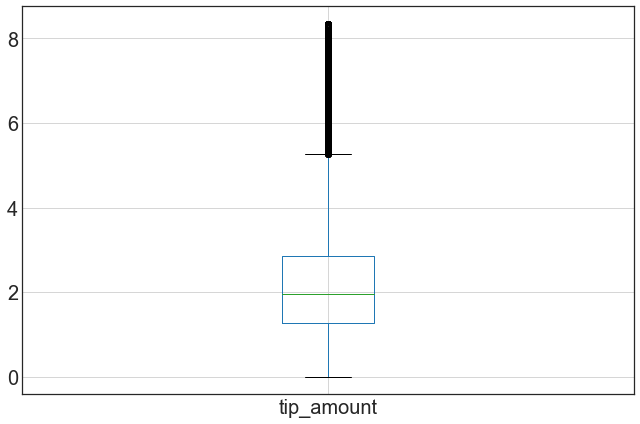

In [87]:
plt.figure(figsize = (9,6))
tip_amount_boxplot = Sample.boxplot(column="tip_amount",fontsize=20)
plt.tight_layout()
plt.show()


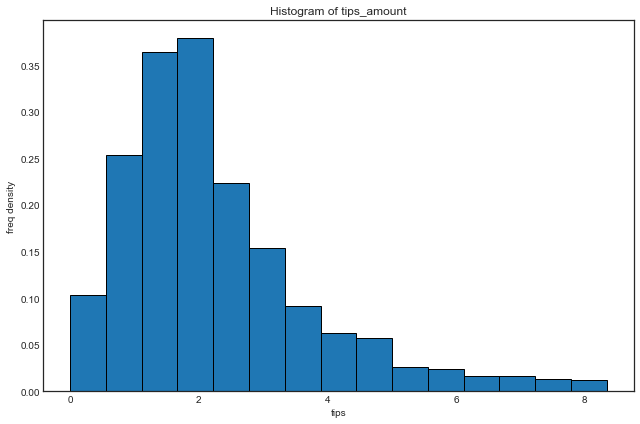

In [88]:
plt.figure(figsize = (9,6))
plt.hist(full_month["tip_amount"],bins = 15,density = True,ec='black')
plt.title('Histogram of tips_amount')
plt.xlabel('tips')
plt.ylabel('freq density')
plt.tight_layout()
plt.show()
fig.savefig('histogramtips.png')

In [89]:
# we could not find any significant pattan for avarage.
# there is a peak for the rainy day, but we only got one rainy day in Sep, we could not conclude rainy day will bring us more tips

In [90]:
#then we would like to consider other factor may infulence our tips 

8.34

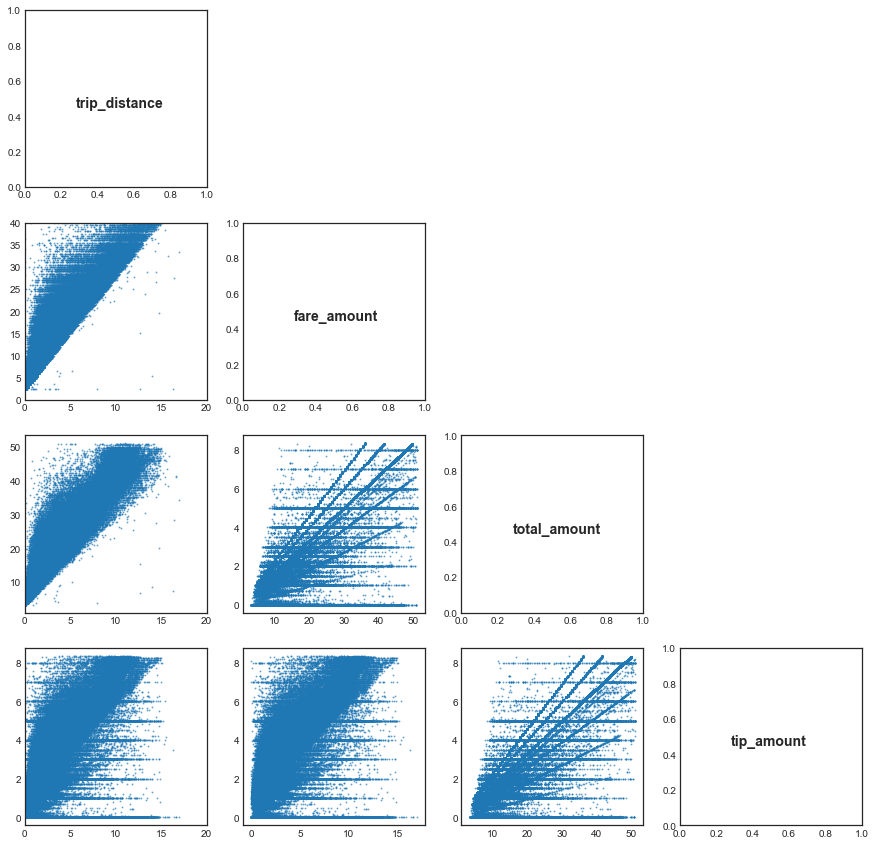

In [106]:
fig, axs = plt.subplots(figsize=(15, 15),ncols=4, nrows=4)


for i in range(4):
    for j in range(4):
        if i<j:
            axs[i, j].axis('off')

#axs[0,0].hist(Sample["trip_distance"],bins = 15,density = True)
#axs[0,0].axis("off")
axs[0,0].text(0.28,0.45,'trip_distance', fontsize=14, fontweight='bold')

axs[1,0].scatter(Sample["trip_distance"],Sample["fare_amount"],s = 1, alpha = 0.5)
axs[1,0].set_xlim([0, 20])
axs[1,0].set_ylim([0, 40])

axs[2,0].scatter(Sample["trip_distance"],Sample["total_amount"],s = 1, alpha = 0.5)
axs[2,0].set_xlim([0, 20])
axs[3,0].scatter(Sample["trip_distance"],Sample["tip_amount"],s = 1, alpha = 0.5)
axs[3,0].set_xlim([0, 20])

#axs[1,1].hist(Sample["fare_amount"],bins = 15,density = True)
#axs[1,1].set_title('fare_amount histo')
#axs[1,1].axis("off")
axs[1,1].text(0.28,0.45,'fare_amount', fontsize=14, fontweight='bold')
axs[2,1].scatter(Sample["total_amount"],Sample["tip_amount"],s = 1, alpha = 0.5)
axs[3,1].scatter(Sample["trip_distance"],Sample["tip_amount"],s = 1, alpha = 0.5)


#axs[2,2].hist(Sample["total_amount"],bins = 15,density = True)
#axs[2,2].axis("off")
axs[2,2].text(0.28,0.45,'total_amount', fontsize=14, fontweight='bold')
axs[3,2].scatter(Sample["total_amount"],Sample["tip_amount"],s = 1, alpha = 0.5)


#axs[3,3].hist(Sample["tip_amount"],bins = 15,density = True)
#axs[3,3].axis("off")
axs[3,3].text(0.28,0.45,'tip_amount', fontsize=14, fontweight='bold')
#axs[1,0].scatter(Sample["total_amount"],Sample["tip_amount"],s = 1, alpha = 0.5)



plt.show()
plt.close()
plt.style.use('seaborn-white')
fig.savefig('pair.png')

In [92]:
# we sampling amount of datas for better view, from the graph we could genrally say that
# the trip distance is directly impact the fare amout 
# and the total_amount are calculated by sum of tips and fare plus other fees

# Thus we focus on the relationship between trip distance and tips

In [1]:
corr = np.corrcoef(Sample["trip_distance"], Sample["tip_amount"])[0][1]
print(corr)

plt.figure(figsize = (9,6))
plt.scatter(Sample["trip_distance"],Sample["tip_amount"],s = 1, alpha =1 )
m, b = np.polyfit(Sample["trip_distance"],Sample["tip_amount"],1)

plt.plot(Sample["trip_distance"], m*Sample["trip_distance"] + b,color='orange',alpha = 2)

plt.legend()
plt.title('Scatter plot between trip distance and tip amount')
plt.xlabel('tirp distance')
plt.xlim([0,15])
plt.ylabel('tips amount')
plt.ylim([0,8])
plt.show()
fig.savefig('Scatter.png')

NameError: name 'np' is not defined

In [20]:
# some horizontal line displays that some of custormer like to choose integers,
# but we could generally say that  as trip distance increase ,the tips increase as well

In [117]:
full_month

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-09-01 00:01:35,2018-09-01 00:09:48,2,1.50,1,N,161,107,1,7.5,0.5,0.5,0.00,0.0,0.3,8.80
1,1,2018-09-01 00:22:22,2018-09-01 00:28:55,1,1.00,1,N,233,100,1,6.5,0.5,0.5,2.00,0.0,0.3,9.80
2,1,2018-09-01 00:46:36,2018-09-01 00:54:49,1,1.90,1,N,48,140,1,8.5,0.5,0.5,1.00,0.0,0.3,10.80
3,1,2018-09-01 00:59:46,2018-09-01 01:02:41,1,0.60,1,N,262,263,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
4,1,2018-09-01 00:22:52,2018-09-01 00:44:56,1,11.70,1,N,138,211,1,33.0,0.5,0.5,8.00,0.0,0.3,42.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211401,2,2018-09-30 23:17:35,2018-09-30 23:29:30,3,2.31,1,N,230,249,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00
5211402,2,2018-09-30 23:38:57,2018-09-30 23:51:51,3,3.75,1,N,186,262,1,13.0,0.5,0.5,2.86,0.0,0.3,17.16
5211403,2,2018-09-30 23:15:34,2018-09-30 23:18:31,1,0.75,1,N,142,163,1,4.5,0.5,0.5,1.74,0.0,0.3,7.54
5211404,2,2018-09-30 23:32:19,2018-09-30 23:41:33,2,2.42,1,N,234,161,1,9.5,0.5,0.5,2.16,0.0,0.3,12.96


In [120]:
h_labels = tips_count.index

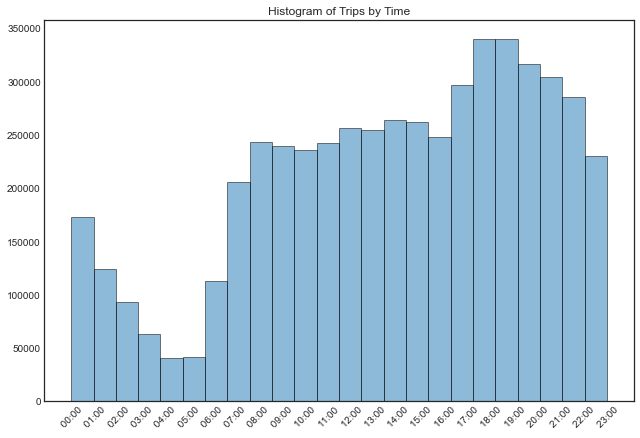

In [121]:
fig, ax = plt.subplots(figsize=(9,6))

ax.hist(full_month["Time_h"], 24, alpha=0.5,histtype='bar', ec='black')
ax.set_xticklabels(h_labels, rotation=45)
fig.tight_layout()

plt.title("Histogram of Trips by Time")
fig.savefig('Histogram of Trips by Time.png')



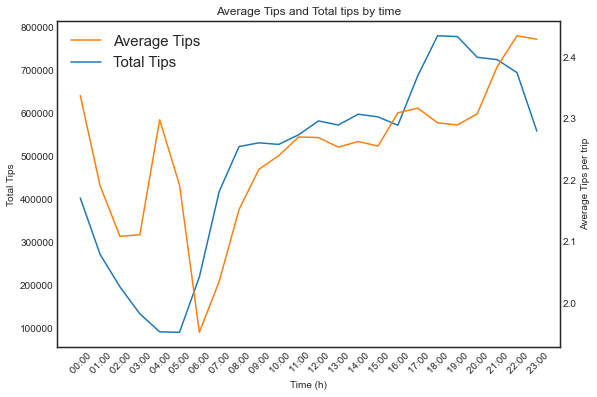

In [123]:
fig, ax = plt.subplots(figsize=(9,6),sharex = True)
ax1 = ax.twinx()



#trip = ax.hist(full_month["Time_h"], 24, alpha=0.5,histtype='bar', ec='black')
avg = ax1.plot((tips_count/time_count),'C1-', label='Average Tips')
total = ax.plot(tips_count,'C0-', label='Total tips')
ax1.set_ylabel(r"Average Tips per trip")
ax.set_xticklabels(h_labels,rotation= 45) 



ax.legend(avg+total, ["Average Tips","Total Tips"], loc=2,prop={'size': 15})
ax.set_xlabel("Time (h)")
ax.set_ylabel(r"Total Tips")
ax.set_title('Average Tips and Total tips by time')

plt.show()


#ax1.legend(loc = 2)
#ax.legend(loc = 2)
fig.tight_layout()

plt.show()
fig.savefig('Average Tips and Total tips by tim.png')
